In [32]:
#Load the Basescan 'cerebrumdao_transfers_bs' data

import pandas as pd

df = pd.read_csv('cerebrumdao_transfers_bs.csv')
df.head()

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,30093180,2025-05-11 15:01:47,0x14dac838467440b5f25c477757512eb348de92b7ccf7...,416844,0x0ee4cef68c21289009eeb9509e0dc366399ebf4612ba...,0x0000000000000000000000000000000000000000,0x3568c7a4f7545805e379c264303239781b4e9a79,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,2.000000e-09,Cerebrum DAO Token,NEURON,18,1,517494,0,104767,159311,deprecated,5265
1,30066113,2025-05-10 23:59:33,0x1edcd1a557e07c720f129643e6376811953e299673b5...,31,0x5a0fc9155e6ede94cd0742d137255a5e191172c2c22f...,0xdb6f1920a889355780af7570773609bd8cb1f498,0x3568c7a4f7545805e379c264303239781b4e9a79,0x3391aaaa8dbdd32b38403693ac58a6a9e3d75410,1.003160e-12,Cerebrum DAO Token,NEURON,18,36,654823,12802464,380875,7202101,deprecated,32332
2,30066113,2025-05-10 23:59:33,0x1edcd1a557e07c720f129643e6376811953e299673b5...,31,0x5a0fc9155e6ede94cd0742d137255a5e191172c2c22f...,0x77e0c0e305453365ac024943b68dd26ca48c8871,0x3568c7a4f7545805e379c264303239781b4e9a79,0xdb6f1920a889355780af7570773609bd8cb1f498,1.003160e-12,Cerebrum DAO Token,NEURON,18,36,654823,12802464,380875,7202101,deprecated,32332
3,30062443,2025-05-10 21:57:13,0xc658b404de957b551518e5934b3f945fb5d99ca71890...,2108,0x0998aa7100b1953910d259f75e8f4000869fea66d485...,0x1111111254eeb25477b68fb85ed929f73a960582,0x3568c7a4f7545805e379c264303239781b4e9a79,0x772f4fea5afb02e2aae7ea83bacf68ec755a1db9,7.544841e-15,Cerebrum DAO Token,NEURON,18,172,162515,2569199,141325,56437536,deprecated,36002
4,30062443,2025-05-10 21:57:13,0xc658b404de957b551518e5934b3f945fb5d99ca71890...,2108,0x0998aa7100b1953910d259f75e8f4000869fea66d485...,0x77e0c0e305453365ac024943b68dd26ca48c8871,0x3568c7a4f7545805e379c264303239781b4e9a79,0x1111111254eeb25477b68fb85ed929f73a960582,7.544841e-15,Cerebrum DAO Token,NEURON,18,172,162515,2569199,141325,56437536,deprecated,36002


In [33]:
# Basic Data Overview
# >> How many transfers?
# >> Date range of data?
# >> How many unique addresses involved?

print("Total transfers:", len(df))
print("Date range:", df['timeStamp'].min(), "to", df['timeStamp'].max())
print("Unique sender addresses:", df['from'].nunique())
print("Unique recipient addresses:", df['to'].nunique())

Total transfers: 10000
Date range: 2024-12-27 04:11:41 to 2025-05-11 15:01:47
Unique sender addresses: 1201
Unique recipient addresses: 1414


In [ ]:
# ANALYZE KEY KPIs

In [ ]:
# Token Distribution (Decentralization)
# >> How many unique holders?
# >> Are tokens concentrated in a few wallets?

In [34]:
# Calculate current balances for each address
from collections import defaultdict

balances = defaultdict(float)
for _, row in df.iterrows():
    balances[row['to']] += row['value']
    balances[row['from']] -= row['value']

balances_df = pd.DataFrame(list(balances.items()), columns=['address', 'balance'])
balances_df = balances_df[balances_df['balance'] > 0].sort_values('balance', ascending=False)
balances_df.head(10)

,address,balance
0,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,2.204609e-09
4,0x77e0c0e305453365ac024943b68dd26ca48c8871,2.698855e-10
46,0xdb9f90626b16551810a3493f85cee01eb9eaff63,6.535475e-11
1065,0xf4937657ed8b3f3cb379eed47b8818ee947beb1e,3.918582e-11
35,0x801c8a65977661210a596465da90fb5ec1e19457,1.729614e-11
548,0x2213a7c507e0c22253f248357bbd360cabd3d6ab,1.265100e-11
869,0x545600fa318f1e717756ff461cf0e7e0ecff08e3,1.158661e-11
932,0x6a1a252e84bf1569be1652c53801c85e26b142fe,1.085106e-11
823,0x0b19f10f75104de7b98a70fa8ab979457600aeb7,7.021774e-12
931,0x078e88e465f2a430399e319d57543a7a76e97668,6.076134e-12


In [35]:
# Top 10 holders’ share of total supply.

total_supply = balances_df['balance'].sum()
top_10_share = balances_df.head(10)['balance'].sum() / total_supply * 100
print(f"Top 10 holders own {top_10_share:.2f}% of total supply")

Top 10 holders own 97.47% of total supply


In [36]:
# Top 5 holders’ share of total supply.

total_supply = balances_df['balance'].sum()
top_5_share = balances_df.head(5)['balance'].sum() / total_supply * 100
print(f"Top 5 holders own {top_5_share:.2f}% of total supply")

Top 5 holders own 95.69% of total supply


In [37]:
# Top 3 holders’ share of total supply.

total_supply = balances_df['balance'].sum()
top_3_share = balances_df.head(3)['balance'].sum() / total_supply * 100
print(f"Top 3 holders own {top_3_share:.2f}% of total supply")

Top 3 holders own 93.61% of total supply


In [38]:
# debug timeStamp format. Index is none

#Summary
#Convert 'timeStamp' to datetime (if not already).
#Set 'timeStamp' as the index.
#Drop rows with missing timestamps.
#Check the date range.
#Resample and plot.

print(df.columns)
print(df.index.name)

Index(['blockNumber', 'timeStamp', 'hash', 'nonce', 'blockHash', 'from',
       'contractAddress', 'to', 'value', 'tokenName', 'tokenSymbol',
       'tokenDecimal', 'transactionIndex', 'gas', 'gasPrice', 'gasUsed',
       'cumulativeGasUsed', 'input', 'confirmations'],
      dtype='object')
None


In [39]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], errors='coerce')
df = df.set_index('timeStamp')
df = df[~df.index.isna()]
print(df.index.min(), df.index.max())

2024-12-27 04:11:41 2025-05-11 15:01:47


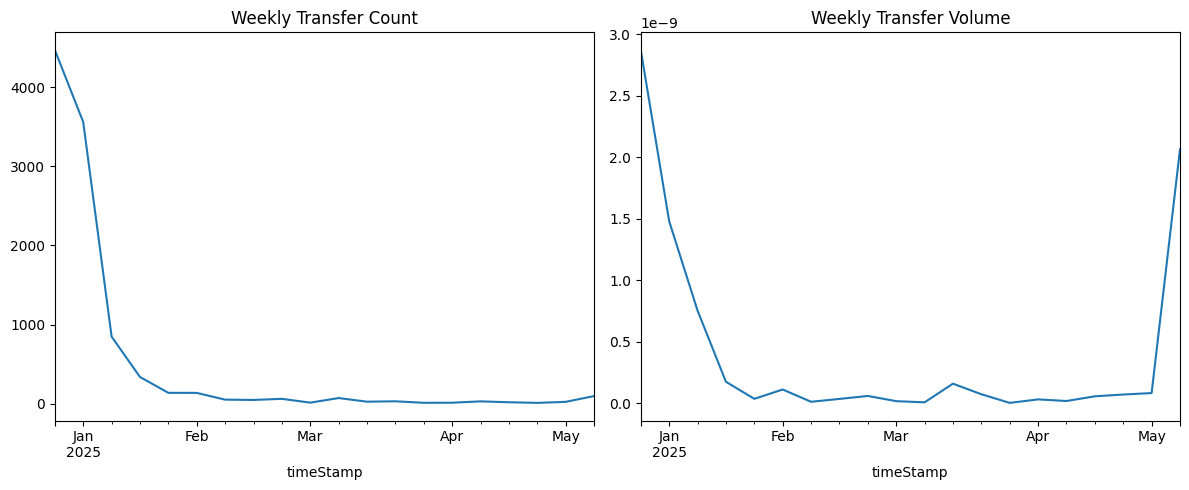

In [40]:
# Activity Over Time
# >> Are transfers increasing, steady, or declining?
# >> KPI: Weekly/monthly transfer count and volume.

#If your index is a string that looks like a date, use pd.to_datetime(df.index) (no unit='s').
#Only use unit='s' if your data is in UNIX timestamp format (numbers).


df.index = pd.to_datetime(df.index)
weekly_transfers = df.resample('W').size()
weekly_volume = df.resample('W')['value'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
weekly_transfers.plot(title='Weekly Transfer Count')
plt.subplot(1,2,2)
weekly_volume.plot(title='Weekly Transfer Volume')
plt.tight_layout()
plt.show()

In [41]:
# May volume spike analysis

print(weekly_volume.sort_values(ascending=False).head(3))

timeStamp
2024-12-29    2.873417e-09
2025-05-11    2.065341e-09
2025-01-05    1.480477e-09
Name: value, dtype: float64


In [42]:
spike_week = '2025-05-11'

# Get all transactions in that week
week_start = pd.to_datetime(spike_week) - pd.Timedelta(days=6)
week_end = pd.to_datetime(spike_week)

spike_df = df.loc[week_start:week_end]
print(spike_df[['from', 'to', 'value']].sort_values('value', ascending=False).head(10))

Empty DataFrame
Columns: [from, to, value]
Index: []


In [43]:
# transfer happened today, no data for a whole week
print(df.index.name)
print(df.index.dtype)

import datetime
today = pd.Timestamp(datetime.date.today())
today_df = df.loc[df.index.normalize() == today]
print(today_df[['from', 'to', 'value']].sort_values('value', ascending=False).head(10))

timeStamp
datetime64[ns]
                                                           from  \
timeStamp                                                         
2025-05-11 15:01:47  0x0000000000000000000000000000000000000000   

                                                             to         value  
timeStamp                                                                      
2025-05-11 15:01:47  0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd  2.000000e-09  


In [ ]:
# new tokens minted  by zero address (wallet 0x00...000) small amount.
# sign of activity after a long quiet period of time

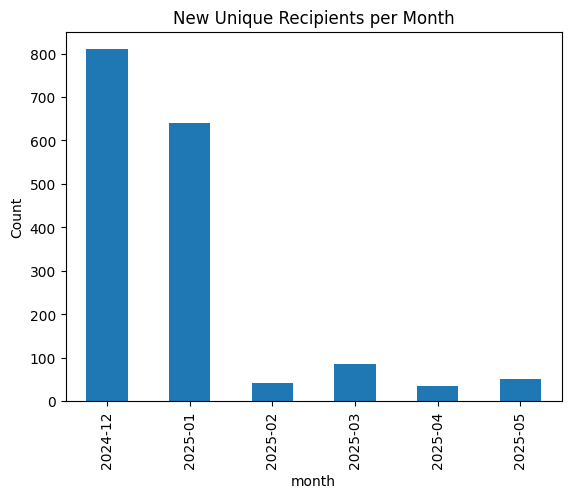

In [44]:
# Holder Churn and Engagement
# >> How many new addresses receive tokens each month?
# >> KPI: New unique recipients per month.

df['month'] = df.index.to_period('M')
new_recipients = df.groupby('month')['to'].nunique()
new_recipients.plot(kind='bar', title='New Unique Recipients per Month')
plt.ylabel('Count')
plt.show()

In [45]:
# Large Transactions (Whale Activity) very low amounts in general
# >> Are there big transfers?
# >> KPI: Number and size of transfers above a threshold (e.g., 1% of total supply).

large_tx_threshold = total_supply * 0.01
large_txs = df[df['value'] > large_tx_threshold]
print("Number of large transfers:", len(large_txs))
display(large_txs[['from', 'to', 'value', 'hash']])

Number of large transfers: 12


,from,to,value,hash
timeStamp,,,,
2025-05-11 15:01:47,0x0000000000000000000000000000000000000000,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,2.000000e-09,0x14dac838467440b5f25c477757512eb348de92b7ccf7...
2025-05-04 22:08:47,0x0250e5cfa564e26aba0af8399328a7169fb94e02,0xdb9f90626b16551810a3493f85cee01eb9eaff63,6.535475e-11,0x3ecc67265ae2c5cdfa5ff2f07e47d1204fdcc6dd5e70...
2025-04-25 22:02:23,0x1ad95af27e2672a255461b1c7962e0cbd940f0ac,0x0250e5cfa564e26aba0af8399328a7169fb94e02,6.535475e-11,0x1778d8d487551f0c528fd30cbbbba92ad88ef5963704...
2025-03-10 23:18:45,0xd688ab46dc476a05a093e4442d06ceb348adbda8,0x77e0c0e305453365ac024943b68dd26ca48c8871,3.688198e-11,0xd15c827a97ea192df665c0aea0f417204c3f1417734d...
2025-03-10 23:18:45,0x396f0e55fa33513441d556f84a6ea5c6fd7d217b,0xd688ab46dc476a05a093e4442d06ceb348adbda8,3.688198e-11,0xd15c827a97ea192df665c0aea0f417204c3f1417734d...
2025-01-06 18:40:55,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,0x77e0c0e305453365ac024943b68dd26ca48c8871,3.872097e-11,0x3a0951f3478a46ec15abbae99c451af9ad2835592b6e...
2025-01-06 18:35:33,0x0000000000000000000000000000000000000000,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,2.970000e-10,0x75716117d32a1f3fdcc8f4740e8ece2887815cb7b36d...
2025-01-04 12:21:25,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,0x77e0c0e305453365ac024943b68dd26ca48c8871,6.800000e-11,0x1911267853278e0365ed80d9744ed1c1b544f8141cf7...
2025-01-04 12:14:19,0xc8ffeff4469642b42e0e841d89153e4fac70c5f2,0x8fed80cfb986a7d04b6784bc6fa6f589cecdc3dd,5.766555e-11,0xa67324f1a86e4d08bd0c3f387c6044225373d7bb1865...


In [46]:
# Dormant vs. Active Addresses
# >> How many addresses are active (sent/received in last 30 days)?

recent_cutoff = df.index.max() - pd.Timedelta(days=30)
recent_df = df[df.index > recent_cutoff]
active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())
print("Active addresses in last 30 days:", len(active_addresses))

Active addresses in last 30 days: 73


/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_2346/2690235191.py:6: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())


In [47]:
# >> How many addresses are active (sent/received in last 90 days)?

recent_cutoff = df.index.max() - pd.Timedelta(days=90)
recent_df = df[df.index > recent_cutoff]
active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())
print("Active addresses in last 90 days:", len(active_addresses))

Active addresses in last 90 days: 223


/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_2346/434855838.py:5: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  active_addresses = pd.unique(recent_df['from'].tolist() + recent_df['to'].tolist())


In [48]:
print("Total transactions:", len(df)) #total transactions

# Weekly
print(df.resample('W').size())

# Monthly
print(df.resample('M').size())



Total transactions: 10000
timeStamp
2024-12-29    4469
2025-01-05    3559
2025-01-12     848
2025-01-19     338
2025-01-26     138
2025-02-02     137
2025-02-09      52
2025-02-16      48
2025-02-23      62
2025-03-02      14
2025-03-09      72
2025-03-16      26
2025-03-23      31
2025-03-30      12
2025-04-06      13
2025-04-13      30
2025-04-20      19
2025-04-27      11
2025-05-04      24
2025-05-11      97
Freq: W-SUN, dtype: int64
timeStamp
2024-12-31    4928
2025-01-31    4545
2025-02-28     189
2025-03-31     149
2025-04-30      74
2025-05-31     115
Freq: ME, dtype: int64


/var/folders/nl/qcn3hjks21bdn5btqv97xb840000gn/T/ipykernel_2346/181650175.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(df.resample('M').size())


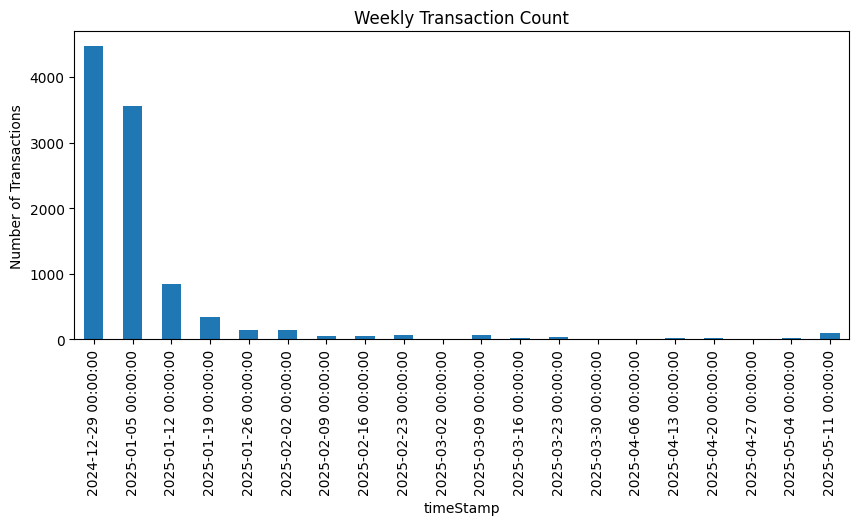

In [49]:
# plot transactions per week
import matplotlib.pyplot as plt

weekly = df.resample('W').size()
plt.figure(figsize=(10,4))
weekly.plot(kind='bar')
plt.title('Weekly Transaction Count')
plt.ylabel('Number of Transactions')
plt.show()

In [50]:
# Summary tables

print("Total transactions:", len(df))
print("First transaction:", df.index.min())
print("Last transaction:", df.index.max())
print("Active days:", df.index.normalize().nunique())
print("Average transactions per active day:", len(df) / df.index.normalize().nunique() if df.index.normalize().nunique() > 0 else 0)

Total transactions: 10000
First transaction: 2024-12-27 04:11:41
Last transaction: 2025-05-11 15:01:47
Active days: 111
Average transactions per active day: 90.09009009009009


In [ ]:
# Step 5: Interpret in Context of Mission
# >> If the mission is decentralization: High concentration in top wallets is a red flag.
# >> If the mission is community engagement: Low new recipient count or declining activity is a concern.
# >> If the mission is funding research: Look for transfers to known research addresses or grant disbursements.


# Step 6: Next Steps
# >> Visualize top holders (pie/bar chart).
# >> Analyze governance activity (if available).
# >> Compare on-chain activity to off-chain (Twitter, Discord) for holistic view.